# Building a Convolutional Neural Network (CNN)
*Building a CNN to classify images from CIFAR-100 dataset and testing its performance.*



In [ ]:
# imports
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import random

## Downloading and preparing image data

In [ ]:
# load data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()


### get subset of first ten classes and 100 training images and 20 testing images

# Initialize lists to store the selected indices for each class
train_indices = []
test_indices = []

# Select 100 training images and 20 testing images for each class
for class_label in range(10):
    class_train_indices = np.where(train_labels.flatten() == class_label)[0][:100]
    class_test_indices = np.where(test_labels.flatten() == class_label)[0][:20]

    train_indices.extend(class_train_indices)
    test_indices.extend(class_test_indices)

# Extract the subset based on the selected indices
train_images = train_images[train_indices]
train_labels = train_labels[train_indices]
test_images = test_images[test_indices]
test_labels = test_labels[test_indices]

# Print the shapes of the subset
print("Subset shape - Training Set: Images:", train_images.shape, " Labels:", train_labels.shape)
print("Subset shape - Testing Set: Images:", test_images.shape, " Labels:", test_labels.shape)

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# define label_names (list taken and edited from GitHub keras thread: https://github.com/keras-team/keras/issues/2653 )
label_names = ['apple', 'aquarium fish', 'baby', 'bear', 'beaver',
               'bed', 'bee', 'beetle', 'bicycle', 'bottle']

Subset shape - Training Set: Images: (1000, 32, 32, 3)  Labels: (1000, 1)
Subset shape - Testing Set: Images: (200, 32, 32, 3)  Labels: (200, 1)


## Verify data
Plot a few random images and their corresponding labels.

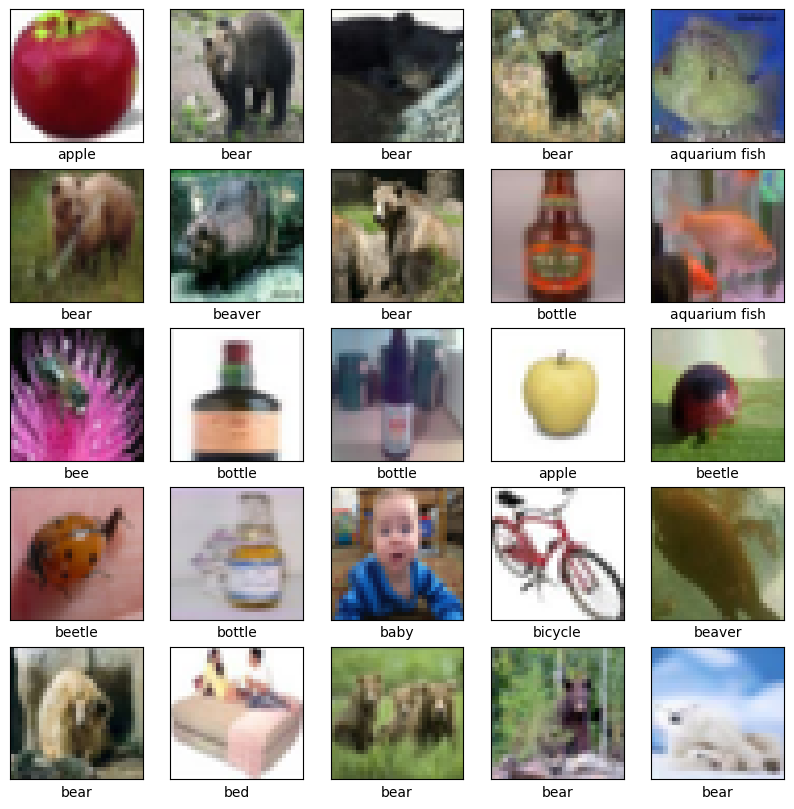

In [ ]:
plt.figure(figsize=(10,10))
j = 1
for i in random.sample(range(0, 1000), 25):
    plt.subplot(5,5,j)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(label_names[train_labels[i][0]])
    j += 1
plt.show()

## Building the model

### Convolutional base with convolutional and max pooling layers

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3))) #configure input shape
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

### Inner dense layers

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

## Compiling and training the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
32/32 [==============================] - 7s 132ms/step - loss: 2.2681 - accuracy: 0.1490 - val_loss: 2.1557 - val_accuracy: 0.1900
Epoch 2/10
32/32 [==============================] - 3s 91ms/step - loss: 2.1858 - accuracy: 0.1780 - val_loss: 2.0966 - val_accuracy: 0.2150
Epoch 3/10
32/32 [==============================] - 2s 60ms/step - loss: 2.0742 - accuracy: 0.2250 - val_loss: 1.9440 - val_accuracy: 0.2800
Epoch 4/10
32/32 [==============================] - 2s 61ms/step - loss: 1.8970 - accuracy: 0.3190 - val_loss: 1.7271 - val_accuracy: 0.3550
Epoch 5/10
32/32 [==============================] - 2s 61ms/step - loss: 1.7525 - accuracy: 0.3730 - val_loss: 1.6689 - val_accuracy: 0.4000
Epoch 6/10
32/32 [==============================] - 2s 62ms/step - loss: 1.6384 - accuracy: 0.4260 - val_loss: 1.5619 - val_accuracy: 0.4400
Epoch 7/10
32/32 [==============================] - 2s 62ms/step - loss: 1.5007 - accuracy: 0.4770 - val_loss: 1.6434 - val_accuracy: 0.4700
Epoch 8/10
3

## Evaluate the model

7/7 - 0s - loss: 1.6623 - accuracy: 0.4650 - 188ms/epoch - 27ms/step


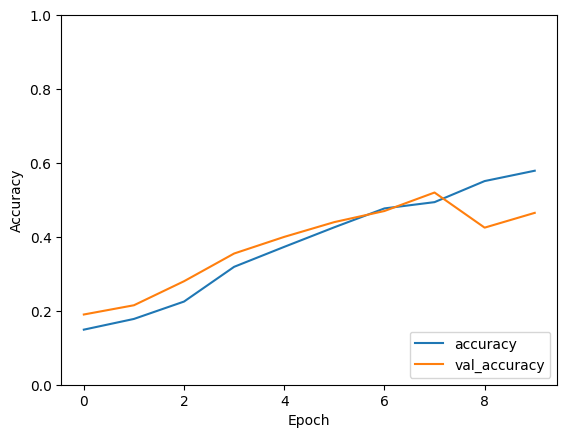

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(f"Test accuracy: {test_acc}")

Test accuracy: 0.4650000035762787


## Reference
Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.